In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Let's load the Colifornia House Pricing Dataset

In [73]:
from sklearn.datasets import fetch_california_housing

In [74]:
housing = fetch_california_housing()

In [75]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [76]:
## Lets check the description of the dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [77]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [78]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [79]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing The Dataset

In [80]:
dataset=pd.DataFrame(housing.data,columns=housing.feature_names)

In [81]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [82]:
dataset['Price']=housing.target

In [83]:
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [84]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [85]:
## Summarizing The Stats of the data
dataset.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [86]:
## Check the missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Price          0.977763
dtype: float64
Skewness of MedInc: 1.6466567021344465


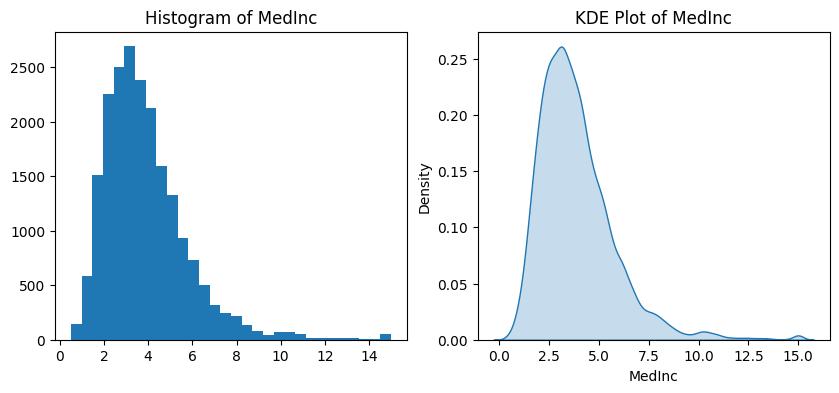

Skewness of HouseAge: 0.060330637599136865


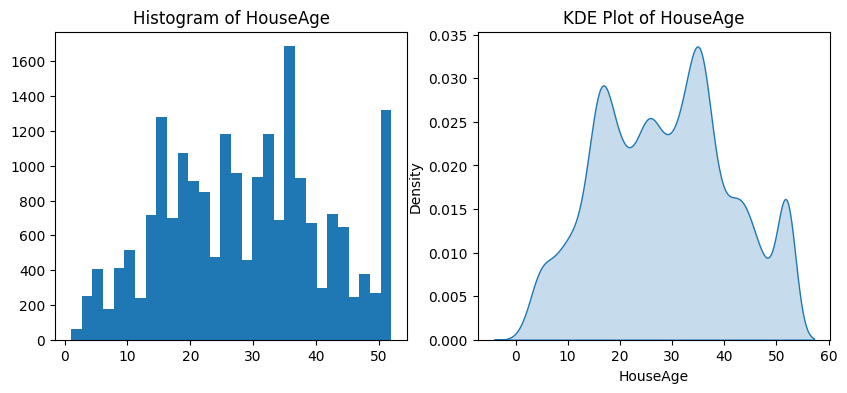

Skewness of AveRooms: 20.697868956710646


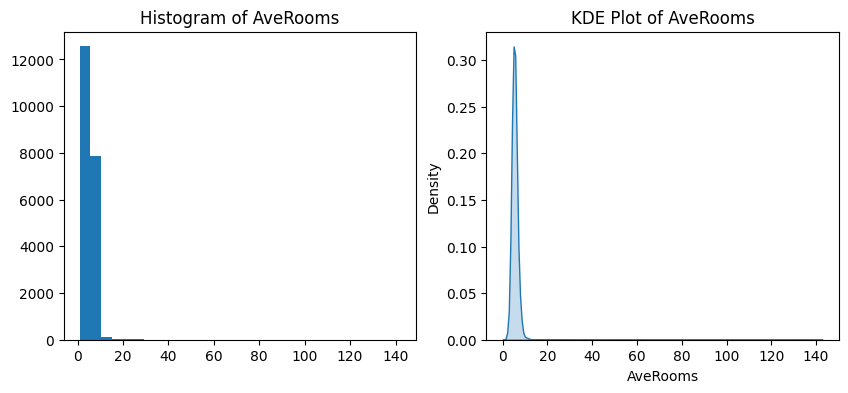

Skewness of AveBedrms: 31.316956246782663


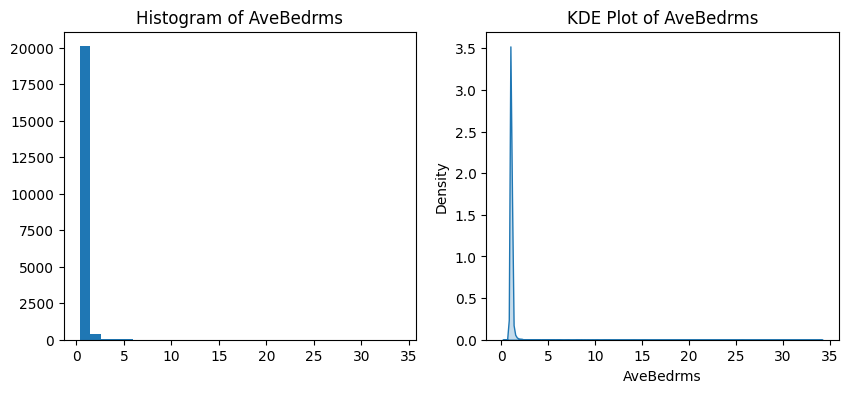

Skewness of Population: 4.93585822672712


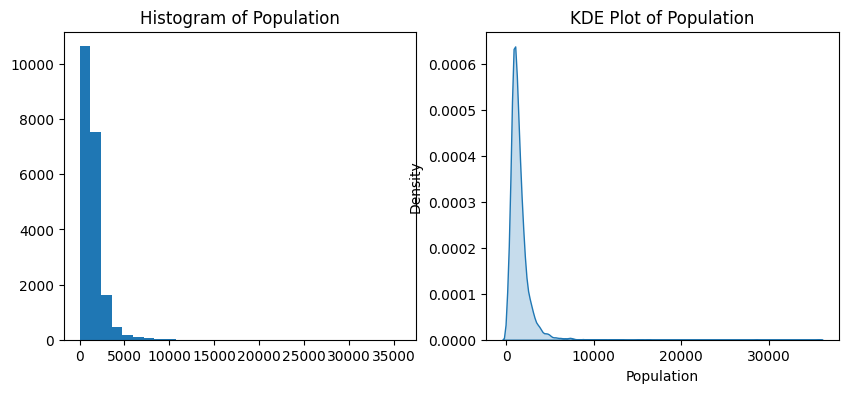

Skewness of AveOccup: 97.63956096369479


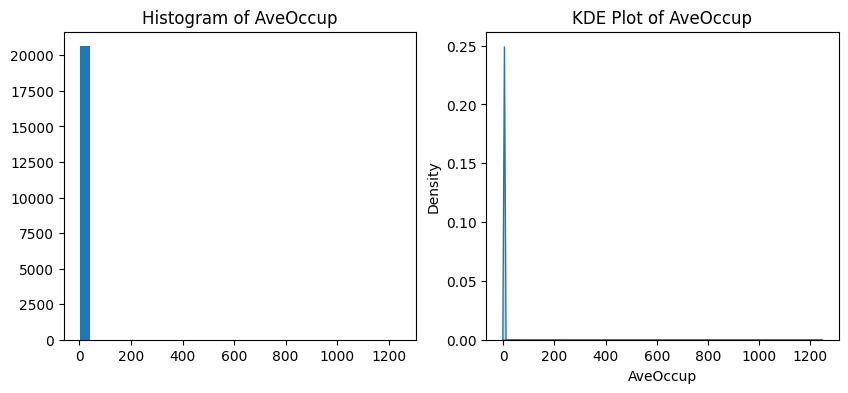

Skewness of Latitude: 0.46595300370997006


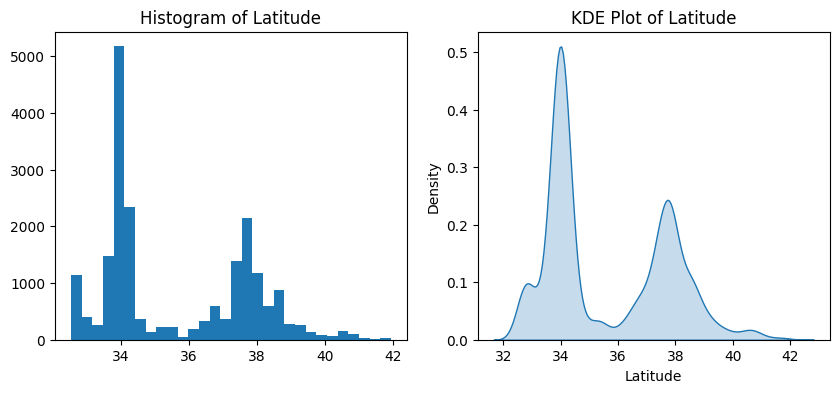

Skewness of Longitude: -0.2978012079524362


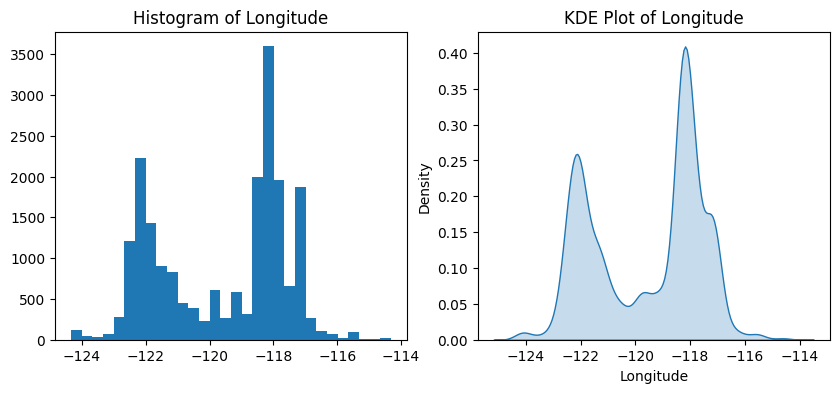

Skewness of Price: 0.9777632739098345


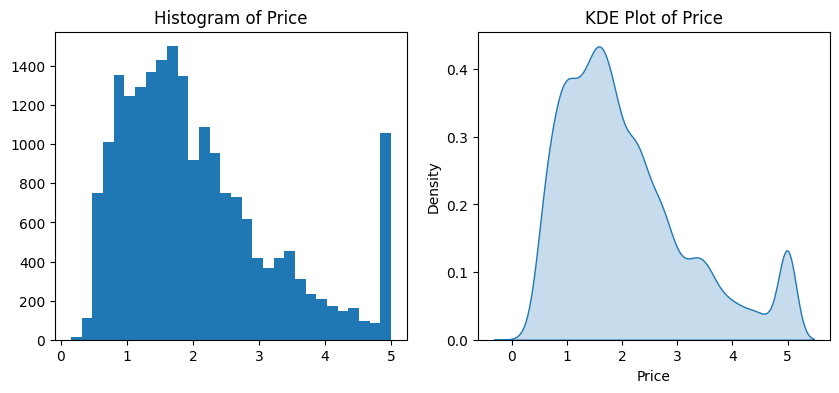

In [87]:
# Check skewness of each numerical column
skewness = dataset.skew()
print(skewness)
# Check skewness and plot for all numerical columns
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    print(f'Skewness of {col}: {dataset[col].skew()}')

    # Plot histogram
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(dataset[col], bins=30)
    plt.title(f'Histogram of {col}')
    
    # Plot KDE
    plt.subplot(1, 2, 2)
    sns.kdeplot(dataset[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    
    plt.show()


0.22608313067130548


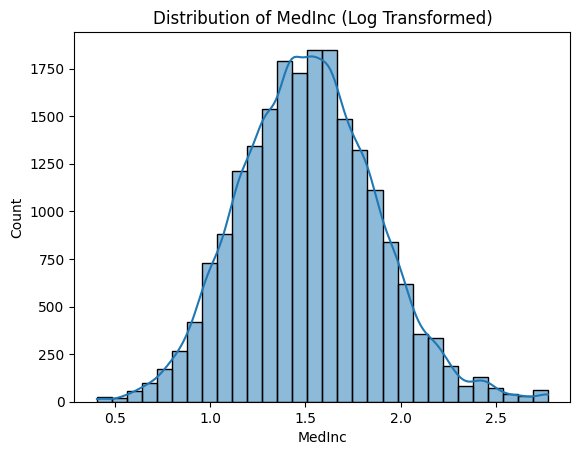

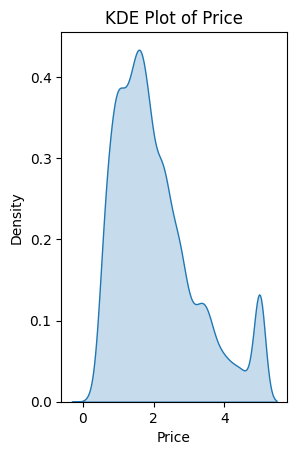

In [88]:
dataset['MedInc'] = np.log1p(dataset['MedInc'])  # log1p(x) = log(x + 1) to handle zero values
print(dataset['MedInc'].skew())
#Histogram
sns.histplot(dataset['MedInc'], bins=30, kde=True)
plt.title("Distribution of MedInc (Log Transformed)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

-0.17014596656716094


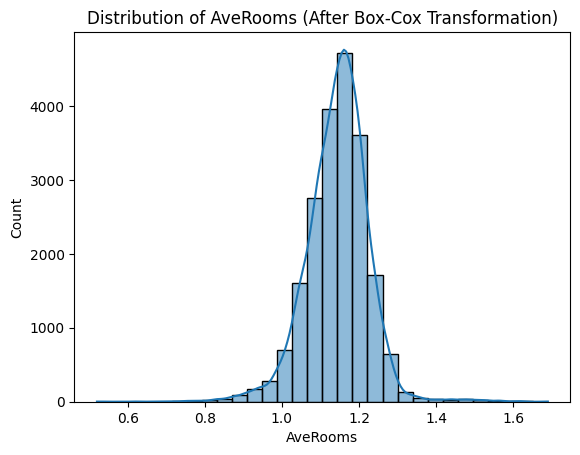

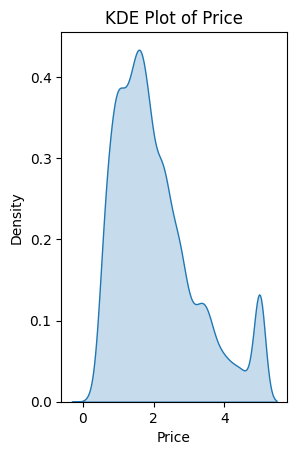

In [89]:
from scipy.stats import boxcox
dataset['AveRooms'], _ = boxcox(dataset['AveRooms'] + 1)  # Adding 1 to avoid zero issues
print(dataset['AveRooms'].skew())  # Check new skewness
#Histogram
sns.histplot(dataset['AveRooms'], bins=30, kde=True)
plt.title("Distribution of AveRooms (After Box-Cox Transformation)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

-1.4466664295874445


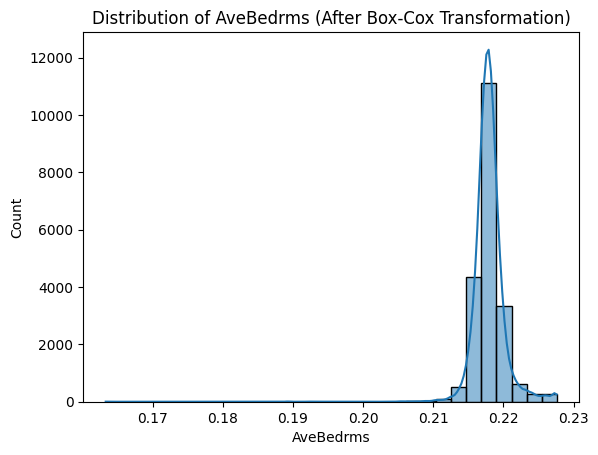

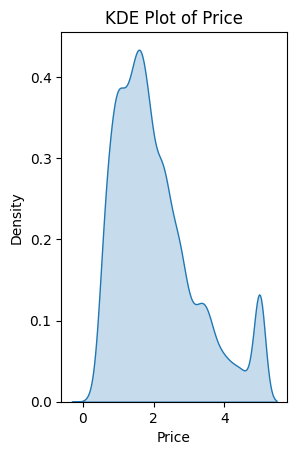

In [90]:
dataset['AveBedrms'], _ = boxcox(dataset['AveBedrms'] + 1)  # Adding 1 to avoid zero issues
print(dataset['AveBedrms'].skew())  # Check new skewness
#Histogram
sns.histplot(dataset['AveBedrms'], bins=30, kde=True)
plt.title("Distribution of AveBedrms (After Box-Cox Transformation)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

0.11064106900257413


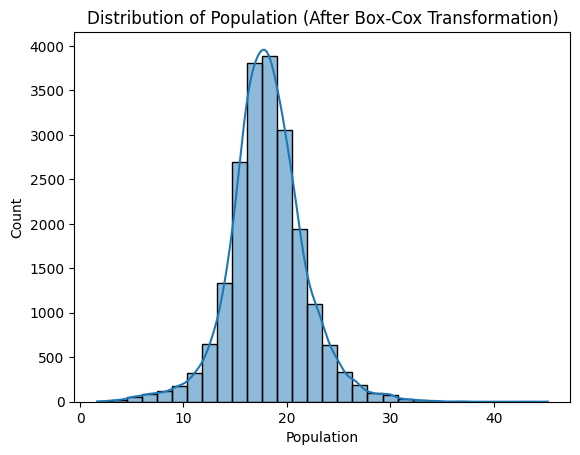

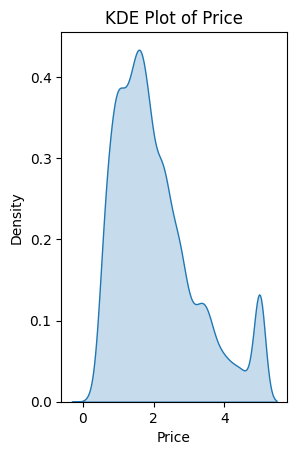

In [91]:
dataset['Population'], _ = boxcox(dataset['Population'] + 1)
print(dataset['Population'].skew())
#Histogram
sns.histplot(dataset['Population'], bins=30, kde=True)
plt.title("Distribution of Population (After Box-Cox Transformation)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

-0.10688772244507135


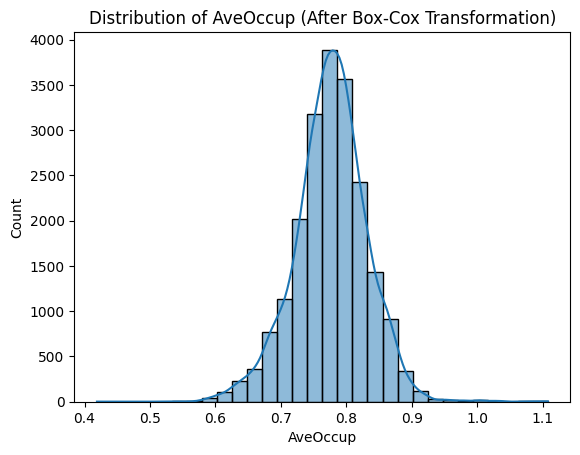

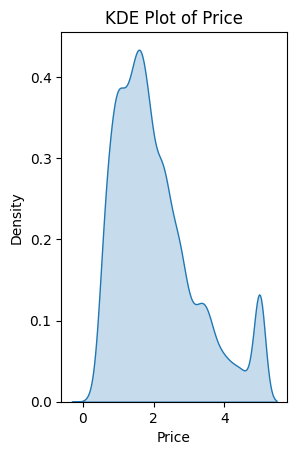

In [92]:
dataset['AveOccup'], _ = boxcox(dataset['AveOccup'] + 1)
print(dataset['AveOccup'].skew())
#Histogram
sns.histplot(dataset['AveOccup'], bins=30, kde=True)
plt.title("Distribution of AveOccup (After Box-Cox Transformation)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

0


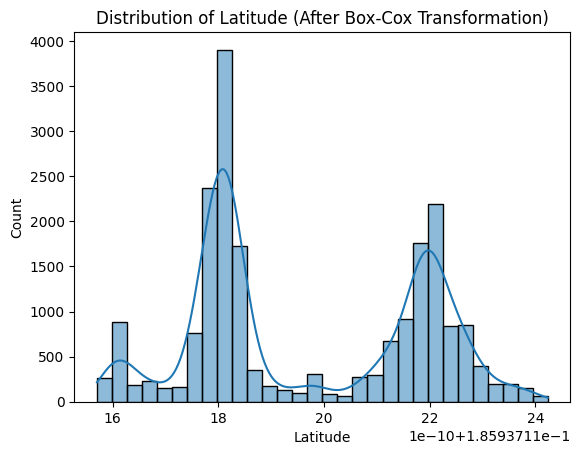

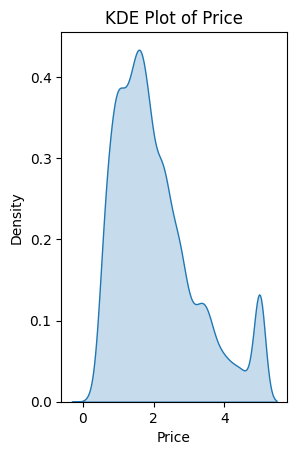

In [93]:
dataset['Latitude'], _ = boxcox(dataset['Latitude'] + 1)  # Adding 1 to avoid zero issues
print(dataset['Latitude'].skew())
#Histogram
sns.histplot(dataset['Latitude'], bins=30, kde=True)
plt.title("Distribution of Latitude (After Box-Cox Transformation)")
plt.show()
#Kde Plot
plt.subplot(1, 2, 2)
sns.kdeplot(dataset[col], fill=True)
plt.title(f'KDE Plot of {col}')
plt.show()

In [94]:
from sklearn.preprocessing import PowerTransformer

# Define the transformer
yeo_johnson = PowerTransformer(method='yeo-johnson')

# Apply the transformation to a single column (e.g., 'Column_Name')
dataset['Longitude'] = yeo_johnson.fit_transform(dataset[['Longitude']])

# Check the skewness after transformation
print("Skewness after Yeo-Johnson:", dataset['Longitude'].skew())


Skewness after Yeo-Johnson: 0


In [95]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.138308  0.587330  -0.186052    0.027886 -0.029116   
HouseAge   -0.138308  1.000000 -0.215656  -0.137214   -0.276999 -0.018953   
AveRooms    0.587330 -0.215656  1.000000   0.291013   -0.100473  0.018340   
AveBedrms  -0.186052 -0.137214  0.291013   1.000000   -0.004185 -0.127934   
Population  0.027886 -0.276999 -0.100473  -0.004185    1.000000  0.220736   
AveOccup   -0.029116 -0.018953  0.018340  -0.127934    0.220736  1.000000   
Latitude   -0.070498  0.027232  0.141706   0.058516   -0.130030 -0.123903   
Longitude  -0.016666 -0.110284 -0.071314   0.019676    0.113090  0.149070   
Price       0.669914  0.105623  0.243095  -0.085920   -0.025152 -0.270553   

            Latitude  Longitude     Price  
MedInc     -0.070498  -0.016666  0.669914  
HouseAge    0.027232  -0.110284  0.105623  
AveRooms    0.141706  -0.071314  0.243095  
AveBedrms   0.058516   0.019676 -0.085920  
Population -0.130030   0.113090 -0.025152  
AveOccup   -0.123903   0.149070 -0.270553  
Latitude    1.000000  -0.934695 -0.122682  
Longitude  -0.934695   1.000000 -0.047609  
Price      -0.122682  -0.047609  1.000000

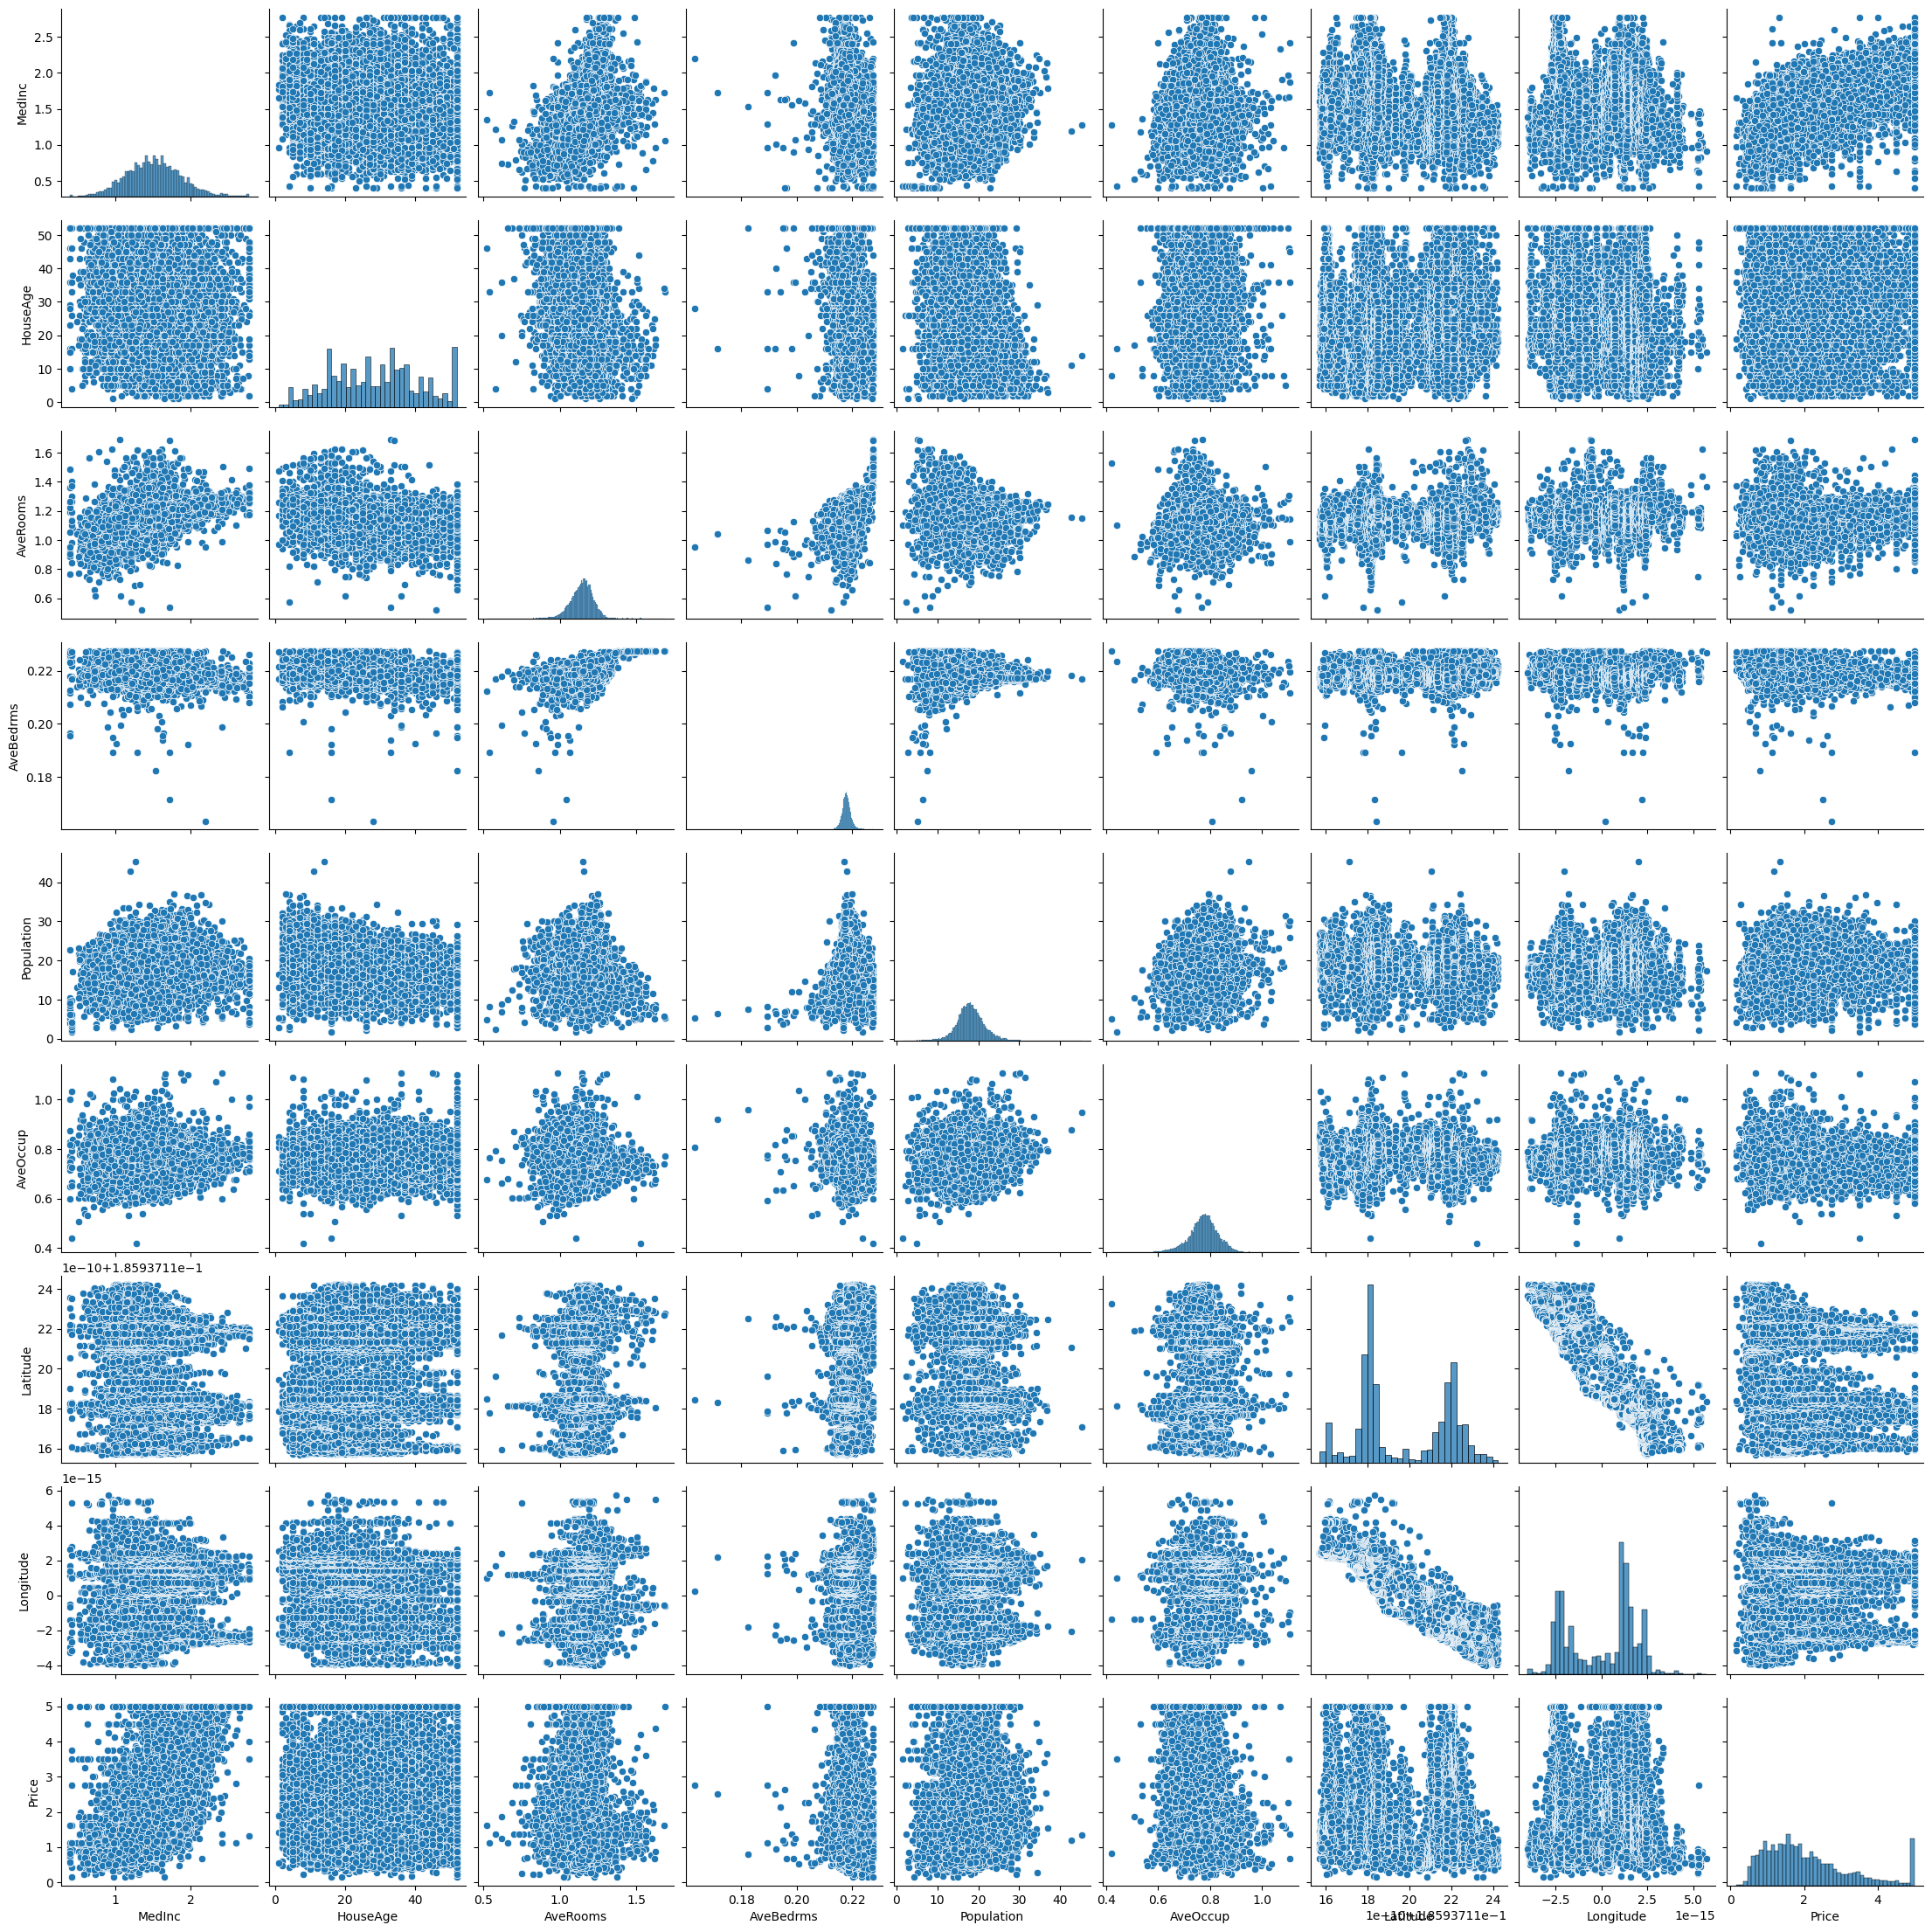

In [96]:
sns.pairplot(dataset)

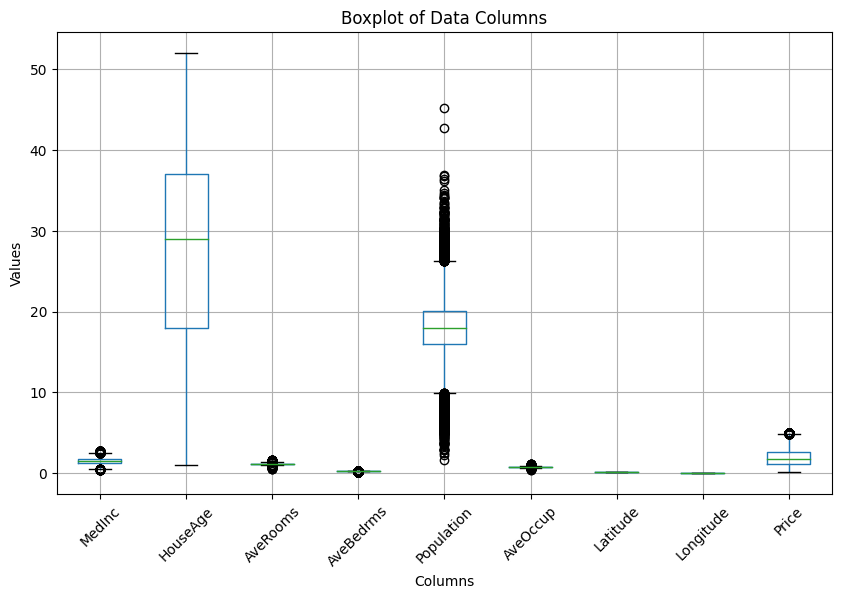

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dataset.boxplot()
plt.title('Boxplot of Data Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analyzing The Correlated Features

In [98]:
dataset.corr()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.138308  0.587330  -0.186052    0.027886 -0.029116   
HouseAge   -0.138308  1.000000 -0.215656  -0.137214   -0.276999 -0.018953   
AveRooms    0.587330 -0.215656  1.000000   0.291013   -0.100473  0.018340   
AveBedrms  -0.186052 -0.137214  0.291013   1.000000   -0.004185 -0.127934   
Population  0.027886 -0.276999 -0.100473  -0.004185    1.000000  0.220736   
AveOccup   -0.029116 -0.018953  0.018340  -0.127934    0.220736  1.000000   
Latitude   -0.070498  0.027232  0.141706   0.058516   -0.130030 -0.123903   
Longitude  -0.016666 -0.110284 -0.071314   0.019676    0.113090  0.149070   
Price       0.669914  0.105623  0.243095  -0.085920   -0.025152 -0.270553   

            Latitude  Longitude     Price  
MedInc     -0.070498  -0.016666  0.669914  
HouseAge    0.027232  -0.110284  0.105623  
AveRooms    0.141706  -0.071314  0.243095  
AveBedrms   0.058516   0.019676 -0.085920  
Population -0.130030   0.113090 -0.025152  
AveOccup   -0.123903   0.149070 -0.270553  
Latitude    1.000000  -0.934695 -0.122682  
Longitude  -0.934695   1.000000 -0.047609  
Price      -0.122682  -0.047609  1.000000

Text(0, 0.5, 'Price')

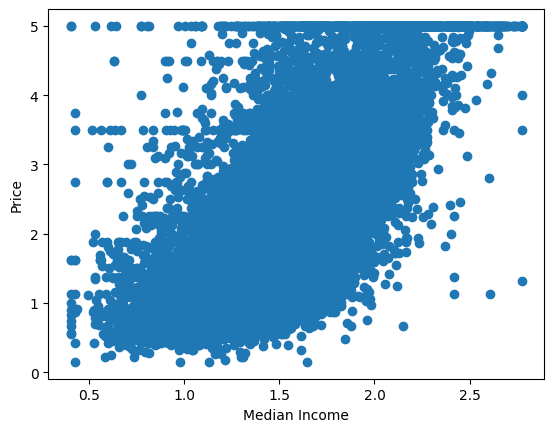

In [99]:
plt.scatter(dataset['MedInc'],dataset['Price'])
plt.xlabel("Median Income")
plt.ylabel("Price")

<Axes: xlabel='MedInc', ylabel='Price'>

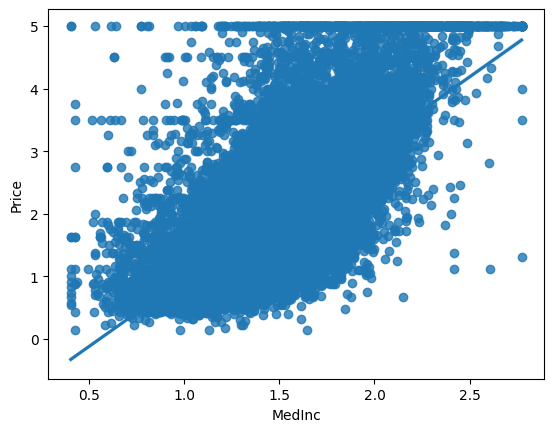

In [100]:
import seaborn as sns
sns.regplot(x="MedInc",y="Price",data=dataset)

Text(0, 0.5, 'Price')

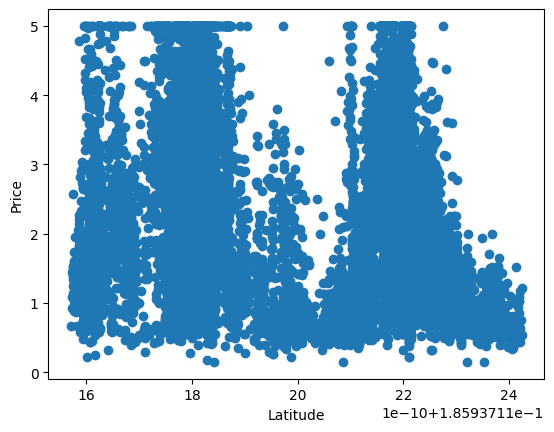

In [101]:
plt.scatter(dataset['Latitude'],dataset['Price'])
plt.xlabel("Latitude")
plt.ylabel("Price")

<Axes: xlabel='Latitude', ylabel='Price'>

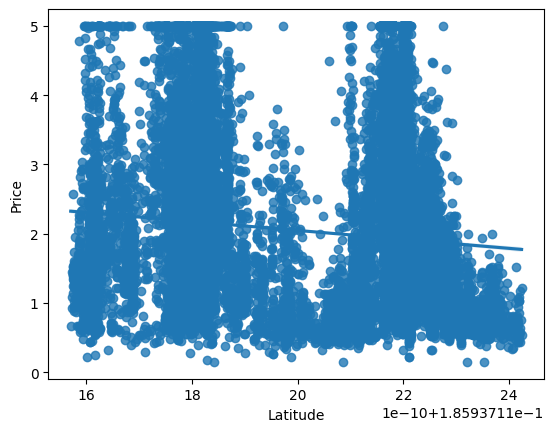

In [102]:
import seaborn as sns
sns.regplot(x="Latitude",y="Price",data=dataset)

<Axes: xlabel='AveOccup', ylabel='Price'>

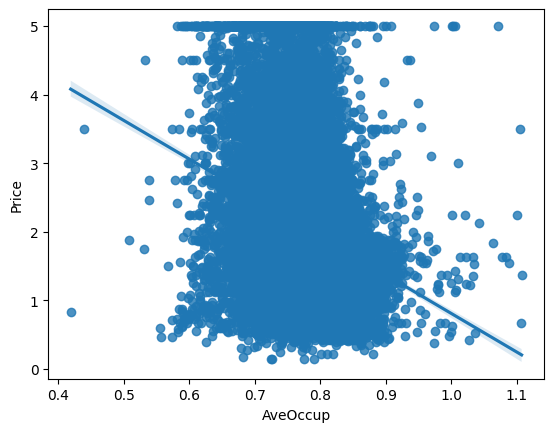

In [103]:
sns.regplot(x="AveOccup",y="Price",data=dataset)

<Axes: xlabel='HouseAge', ylabel='Price'>

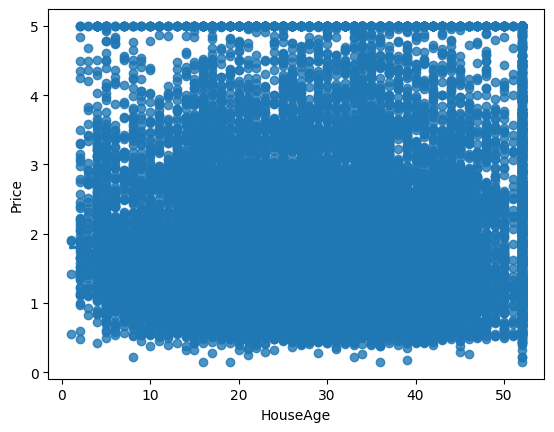

In [104]:
sns.regplot(x="HouseAge",y="Price",data=dataset)

In [105]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [106]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.232720      41.0  1.234372   0.217303   12.223224  0.755821  0.185937   
1  2.230165      21.0  1.202460   0.216060   22.087944  0.710445  0.185937   
2  2.111110      52.0  1.280312   0.218341   13.970688  0.776570  0.185937   
3  1.893579      52.0  1.182107   0.218334   14.478725  0.755137  0.185937   
4  1.578195      52.0  1.204470   0.218489   14.533326  0.718551  0.185937   

      Longitude  
0 -2.414735e-15  
1 -2.414735e-15  
2 -2.414735e-15  
3 -2.414735e-15  
4 -2.414735e-15

In [107]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [108]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [109]:
X_train

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
7061   1.635340      35.0  1.185377   0.216152   18.225107  0.790382   
14689  1.351470      20.0  1.096241   0.218403   17.207959  0.699040   
17323  1.649159      24.0  1.171744   0.216501   15.697995  0.756658   
10056  1.413277      14.0  1.184737   0.218737   11.978681  0.719317   
15750  1.460195      52.0  1.123773   0.218199   19.440845  0.731042   
...         ...       ...       ...        ...         ...       ...   
11284  1.997418      35.0  1.197363   0.214813   15.213779  0.793734   
11964  1.398717      33.0  1.229739   0.221368   20.221200  0.844806   
5390   1.369758      36.0  1.064154   0.218463   20.230981  0.813497   
860    1.904969      15.0  1.209600   0.218233   20.299089  0.803736   
15795  1.274105      52.0  1.011166   0.218048   22.628373  0.710312   

       Latitude     Longitude  
7061   0.185937  1.415534e-15  
14689  0.185937  2.386980e-15  
17323  0.185937 -6.383782e-16  
10056  0.185937 -1.387779e-15  
15750  0.185937 -2.581269e-15  
...         ...           ...  
11284  0.185937  1.471046e-15  
11964  0.185937  2.026157e-15  
5390   0.185937  1.054712e-15  
860    0.185937 -2.192690e-15  
15795  0.185937 -2.553513e-15  

[14448 rows x 8 columns]

In [110]:
X_test

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
20046  0.986264      25.0  1.080558   0.217269   18.937449  0.843496   
3024   1.261666      30.0  1.138806   0.220365   19.580971  0.766601   
15663  1.499645      52.0  1.063365   0.220254   18.610797  0.597852   
20484  1.907704      17.0  1.198992   0.217223   20.062939  0.820250   
9814   1.552868      34.0  1.165035   0.217397   17.521547  0.749248   
...         ...       ...       ...        ...         ...       ...   
17505  1.374854      47.0  1.080839   0.217237   14.656210  0.743292   
13512  0.911921      41.0  1.106971   0.219174   17.182818  0.833483   
10842  1.506741      16.0  1.044993   0.218384   27.034037  0.738274   
16559  1.536867      10.0  1.165532   0.218081   28.291634  0.826165   
5786   1.399211      17.0  1.006448   0.217211   25.623840  0.761066   

       Latitude     Longitude  
20046  0.185937  4.440892e-16  
3024   0.185937  0.000000e+00  
15663  0.185937 -2.581269e-15  
20484  0.185937  7.216450e-16  
9814   0.185937 -2.164935e-15  
...         ...           ...  
17505  0.185937 -2.164935e-15  
13512  0.185937  2.137179e-15  
10842  0.185937  1.526557e-15  
16559  0.185937 -1.637579e-15  
5786   0.185937  1.193490e-15  

[6192 rows x 8 columns]

In [111]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [112]:
X_train=scaler.fit_transform(X_train)

In [113]:
X_test=scaler.transform(X_test)

In [114]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [115]:
X_train

array([[ 0.32640605,  0.50935748,  0.4943909 , ...,  0.25581685,
        -0.78834207,  0.7685458 ],
       [-0.46368252, -0.67987313, -0.60092595, ..., -1.37876929,
        -1.62281212,  1.29231137],
       [ 0.36486806, -0.36274497,  0.32686908, ..., -0.34768679,
        -0.37927989, -0.33884426],
       ...,
       [-0.41278072,  0.58863952, -0.99521272, ...,  0.66946414,
        -0.72317354,  0.57400431],
       [ 1.07686063, -1.07628333,  0.79204741, ...,  0.4947963 ,
         0.98019226, -1.17686916],
       [-0.67901084,  1.85715216, -1.64634466, ..., -1.17705282,
         1.04545292, -1.37141066]])

In [116]:
X_test

array([[-1.48015179, -0.28346293, -0.79363325, ...,  1.20630555,
         0.37621598,  0.24478023],
       [-0.71363192,  0.11294728, -0.07787658, ..., -0.16975405,
        -0.07351689,  0.00534455],
       [-0.05126888,  1.85715216, -1.00490741, ..., -3.18955579,
         1.05557167, -1.38637539],
       ...,
       [-0.03152109, -0.99700129, -1.23066536, ..., -0.67666372,
        -0.96346515,  0.82840473],
       [ 0.05232997, -1.47269353,  0.25053298, ...,  0.89616896,
         1.06228996, -0.87757455],
       [-0.33080701, -0.91771925, -1.7043119 , ..., -0.26879763,
        -0.64652106,  0.64882796]])

## Model Training

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
regression=LinearRegression()

In [119]:
regression.fit(X_train,y_train)

LinearRegression()

In [120]:
## print the coefficients and the intercept
print(regression.coef_)

[ 0.83763426  0.16113329 -0.15313395  0.15796755  0.01462429 -0.25604853
 -0.83411031 -0.78435911]


In [121]:
print(regression.intercept_)

2.069239660926561


In [122]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [123]:
X_test

array([[-1.48015179, -0.28346293, -0.79363325, ...,  1.20630555,
         0.37621598,  0.24478023],
       [-0.71363192,  0.11294728, -0.07787658, ..., -0.16975405,
        -0.07351689,  0.00534455],
       [-0.05126888,  1.85715216, -1.00490741, ..., -3.18955579,
         1.05557167, -1.38637539],
       ...,
       [-0.03152109, -0.99700129, -1.23066536, ..., -0.67666372,
        -0.96346515,  0.82840473],
       [ 0.05232997, -1.47269353,  0.25053298, ...,  0.89616896,
         1.06228996, -0.87757455],
       [-0.33080701, -0.91771925, -1.7043119 , ..., -0.26879763,
        -0.64652106,  0.64882796]])

In [124]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [125]:
reg_pred

array([0.04460091, 1.77063416, 3.65999845, ..., 2.46057586, 1.45735921,
       1.98134598])

## Assumptions

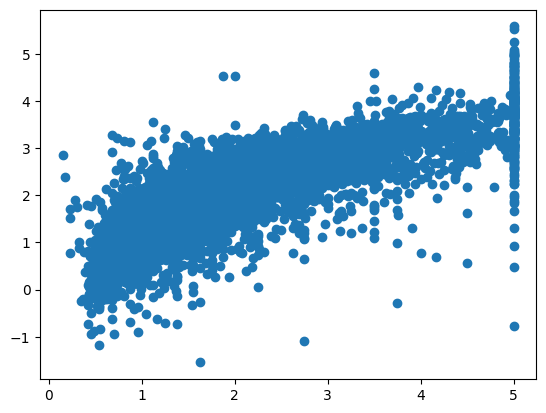

In [126]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [127]:
## Residuals
residuals=y_test-reg_pred

In [128]:
residuals

20046    0.432399
3024    -1.312634
15663    1.340012
20484   -0.457581
9814     0.120981
           ...   
17505    0.039468
13512    0.319619
10842   -0.276576
16559   -0.263359
5786     0.116654
Name: Price, Length: 6192, dtype: float64

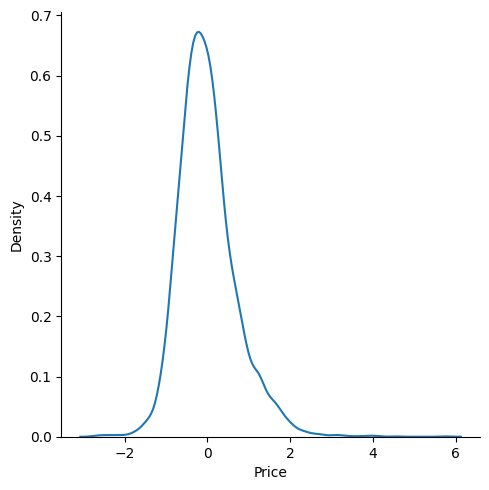

In [129]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

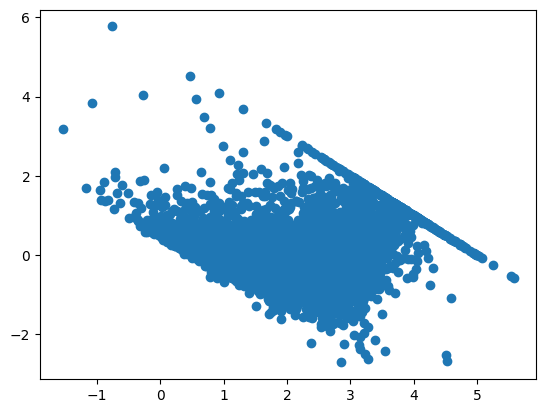

In [130]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5226497352834006
0.48476469980720344
0.6962504576710908


In [132]:
y_mean = y_test.mean()
print(f"Baseline Error (mean target): {y_mean}")


Baseline Error (mean target): 2.066968142764858


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [133]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6306667530224151


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [134]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6301888837072249

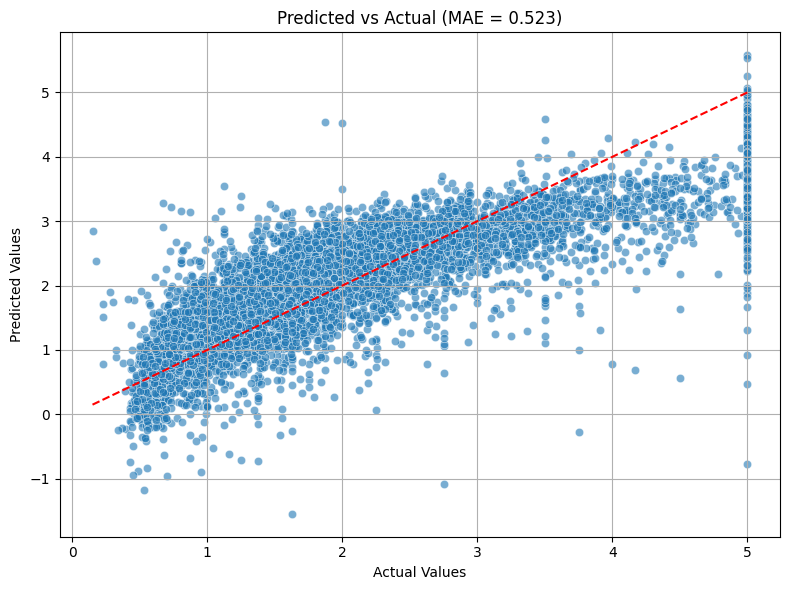

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

# Predict
y_pred = regression.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual (MAE = {mean_absolute_error(y_test, y_pred):.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
import pandas as pd
import numpy as np

# Predict
y_pred = regression.predict(X_test)

# Create a DataFrame to compare
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Filter rows where the actual value is 5 (the maximum value)
max_target_rows = results[results['Actual'] == 5.0]

# Show a few examples
print(max_target_rows.head())

# Optionally, look at the error
max_target_rows['Absolute_Error'] = np.abs(max_target_rows['Actual'] - max_target_rows['Predicted'])
print(max_target_rows.describe())


       Actual  Predicted
15754     5.0   2.943404
16891     5.0   3.533310
15682     5.0   3.778711
14405     5.0   3.783273
10730     5.0   3.444002
       Actual  Predicted  Absolute_Error
count     6.0   6.000000        6.000000
mean      5.0   3.546039        1.453961
std       0.0   0.330276        0.330276
min       5.0   2.943404        1.206464
25%       5.0   3.466329        1.217867
50%       5.0   3.656010        1.343990
75%       5.0   3.782133        1.533671
max       5.0   3.793536        2.056596


/var/folders/xs/_l9szjnn6v7gj7q43hlpc8h40000gn/T/ipykernel_6696/270470820.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_target_rows['Absolute_Error'] = np.abs(max_target_rows['Actual'] - max_target_rows['Predicted'])


## New Data Prediction

In [135]:
X_test2 = housing.data[0]

In [136]:
X_test2

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [137]:
##transformation of new data
X_test2 = scaler.transform([X_test2])

/Applications/AnacondaNavigator/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
y_pred2 = regression.predict(X_test2)

In [139]:
y_pred2

array([5.16904377e+16])

## Pickling The Model file For Deployment

In [140]:
import pickle

In [141]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [142]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [143]:
## Prediction
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/Applications/AnacondaNavigator/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.16904377e+16])